In [ ]:
# import hashlib as hl
# import numpy as np
# import pandas as pd
# import string
# import re
# import lightweight_mmm
# # Import jax.numpy and any other library we might need.
# import jax.numpy as jnp
# import numpyro

# import seaborn as sns


# # Import the relevant modules of the library
# from lightweight_mmm import lightweight_mmm
# from lightweight_mmm import optimize_media
# from lightweight_mmm import plot
# from lightweight_mmm import preprocessing
# from lightweight_mmm import utils
# import holidays
# from sklearn.preprocessing import StandardScaler, OrdinalEncoder
# from sklearn.impute import SimpleImputer
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans
# from sklearn import metrics
# from sklearn.cluster import AgglomerativeClustering
# from ydata_profiling import ProfileReport
# import warnings
# import nbimporter
# import utils.utils_mmm as utils
# from ydata_profiling import ProfileReport
# import matplotlib.ticker as mticker

# from statsmodels.tsa.seasonal import STL 


# from statsmodels.tsa.seasonal import seasonal_decompose

# warnings.filterwarnings('ignore')
# pd.options.mode.chained_assignment = None

In [8]:
import hashlib as hl
import numpy as np
import pandas as pd
import string
import re
import seaborn as sns
import holidays
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import warnings
warnings.filterwarnings('ignore')
# pd.options.mode.chained_assignment = None
# import nbimporter

# from sklearn.preprocessing import StandardScaler, OrdinalEncoder
# from sklearn.impute import SimpleImputer
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.cluster import KMeans
# from sklearn import metrics
# from sklearn.cluster import AgglomerativeClustering

from statsmodels.tsa.seasonal import STL, seasonal_decompose

import jax.numpy as jnp
import numpyro

from ydata_profiling import ProfileReport

from lightweight_mmm import lightweight_mmm, optimize_media, plot, preprocessing, utils
import utils.utils_mmm as utils


**PLEASE NOTE:** All data contained in this and subsequent notebooks is anonymized data that have been derived from a real-world dataset.

# Introduction

## Industry | B2C Healthcare Insurance

The B2C (business-to-consumer) healthcare insurance industry encompasses companies offering individual and family health insurance plans directly to consumers. These plans provide coverage for medical expenses incurred for various health services and treatments. Key features of the B2C healthcare insurance industry include:

* Focus on individual and family plans: Unlike B2B (business-to-business) insurance, which caters to employer-sponsored plans, B2C primarily focuses on individual and family policies purchased directly by consumers.
* Diverse product offerings: Companies offer a variety of health insurance plans with different coverage levels, deductibles, co-pays, and network options to cater to diverse needs and budgets.
* Competitive landscape: The market is highly competitive, with numerous insurance providers vying for market share. This competition can lead to innovative product offerings and competitive pricing.
* Regulatory environment: The industry is heavily regulated by government agencies to ensure consumer protection and financial stability.
* Technology adoption: Technology plays a significant role in the industry, with online enrollment platforms, telemedicine services, and mobile apps becoming increasingly popular.

## Business Challenge | Marketing Mix Optimization

Commited to maximizing [ROAS](https://www.apexure.com/blog/roi-vs-roas-which-is-the-better-metric-for-ad-campaigns) within their $70 million+ annual budget, the marketing team of the nation's largest supplemental insurance provider actively sought recommendations to optimize lead generation and conversions for their insurance products.

Historically, the organization had mainly focused on traditional approaches based on brand marketing to address their core objectives of driving website and call center leads to generate new healthcare premiums. However, this approach lacked a cross-channel view of marketing spend distribution and performance.

The design and adoption of a "test-and-learn" framework that focused on incremental and continous improvements to marketing spend distribution informed via experimenation was needed. One of the first steps identified to help inform and guide this approach was the development of a marketing mix model (MMM).  The model developed served as a catalyst and "North Star" for the marketing organization's adoption of a more data-driven approach to marketing spend optimization. 

The following case study provides a technical summary for the development of the marketing mix model along with some of the next-step recommendations coming out of that exercise.

# Model Development

## Introduction | Marketing Mix Model (MMM)

**Marketing Mix Model (MMM)**<br>
Marketing Mix Modeling (MMM) is a data-driven approach that helps businesses understand how different marketing activities and channels contribute to their key goals, such as sales, conversions, or brand awareness. Overall, MMM is a powerful tool that can help businesses maximize the return on their marketing investment by providing data-driven insights and optimizing their marketing efforts.

**The Evolution of MMM**<br>
Although MMM has been around for decades and has been used a tool for measuring the effectiveness of marketing channels and campaigns, with the advent of digital marketing and the more granular approach to tracking individual users across multiple marketing touchpointsit was overshadowed by some time by 

https://www.databricks.com/blog/what-mmm-and-why-does-it-matter-marketers

## MMM Libraries | Robyn and LightweightMMM

At the time of the original analysis, the model was developed using a multiple linear regression (MLR) technique.  However, since then various open-source libraries have been developed that are better suited for MMM specifically.  For the development of this case study, I assessed two of these libraries developed by major technology companies:

* [Robyn (Meta)](https://facebookexperimental.github.io/Robyn/docs/analysts-guide-to-MMM/) - An open-source project for marketing mix modeling (MMM) developed by Meta's Marketing Science division.
* [LightweightMMM (Google)](https://lightweight-mmm.readthedocs.io/en/latest/) - An open-source library developed and maintained by a team of Google engineers primarily focused on improving marketing mix modeling (MMM) techniques. While not an official Google product, it leverages Google's internal expertise and research in the field of marketing analytics.

https://medium.com/dp6-us-blog/what-is-the-best-mmm-tool-for-your-company-an-evaluation-of-lightweightmmm-orbit-and-robyn-7ccfed2144a9

# Load Media Data

We load the.    

In [9]:
file_path = 'data/mmm_media.csv'
media_bi_df, media_mmm_df = utils.preprocess_media_data(file_path)

min_week = media_mmm_df.week_of.min()
max_week = media_mmm_df.week_of.max()

file_path = 'data/mmm_leads_policies.csv'
leads_bi_df, sales_bi_df, policies_mmm_df, premiums_mmm_df, leads_mmm_df = utils.preprocess_leads_policies_data(file_path, min_week, max_week)



In [3]:
media_mmm_df

,week_of,display_spend,paid_search_spend,print_spend,tv_spend,video_spend
0,2014-01-04,1202.0,17642.29,0.0,1412418.0,75527.0
1,2014-01-11,3032.0,5791.08,0.0,9881.0,97712.0
2,2014-01-18,7658.0,3756.50,0.0,1694508.0,104803.0
3,2014-01-25,9177.0,4360.52,0.0,1073405.0,116840.0
4,2014-02-01,9462.0,5598.07,0.0,299186.0,83999.0
...,...,...,...,...,...,...
99,2015-11-28,89454.0,20257.57,3295.0,1005178.0,144905.0
100,2015-12-05,95721.0,25681.25,0.0,759559.0,88381.0
101,2015-12-12,61284.0,28171.60,0.0,88128.0,84995.0
102,2015-12-19,101472.0,17760.68,0.0,317860.0,50532.0


In [4]:

# Write for BI
leads_bi_df.to_csv('data/leads_bi.csv', index=False)
sales_bi_df.to_csv('data/sales_bi.csv', index=False)
media_bi_df.to_csv('data/media_bi.csv', index=False)
premiums_mmm_df.to_csv('data/premiums_mmm.csv', index=False)

## Media Cost vs. Annual Premiums

Compare blah blah blah.

C:\Users\dfsan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dfsan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dfsan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
 

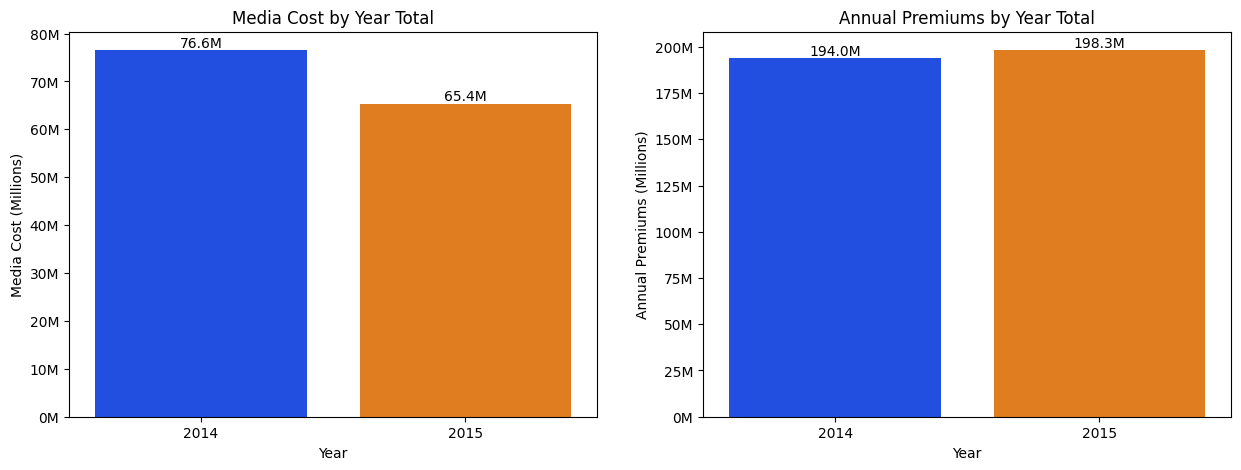

In [5]:
utils.plot_media_and_premiums_YoY(media_bi_df, premiums_mmm_df)

## Leads vs. Polices 

Leads vs Policies blah blah

C:\Users\dfsan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dfsan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dfsan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
 

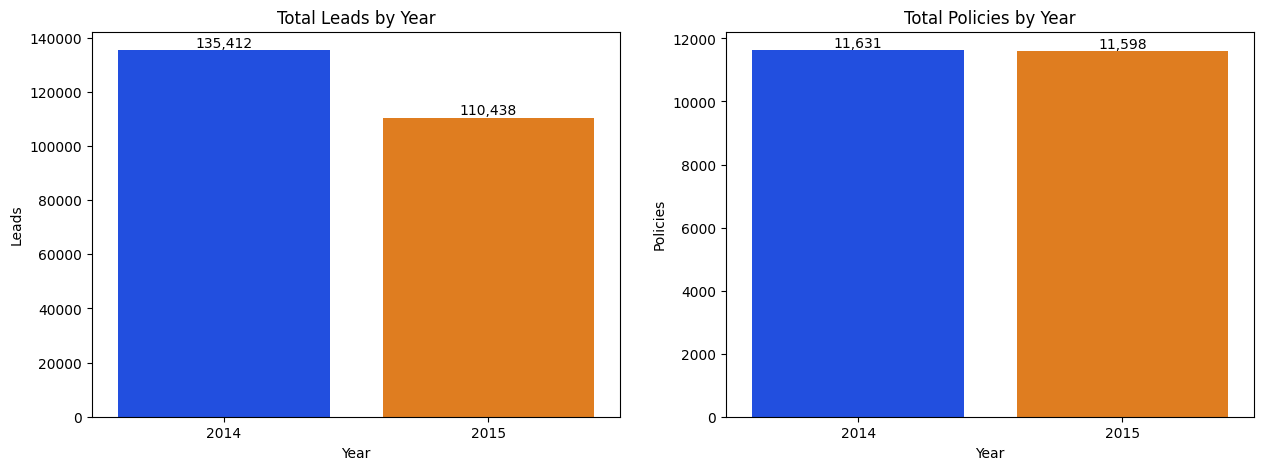

In [6]:
utils.plot_leads_and_policies_YoY(leads_mmm_df, policies_mmm_df)

## Conversion Rate and ROAS

Lorem ipsum blah blah

In [7]:
utils.plot_conv_rate_and_roas_YoY(conv_rate_mmm_df, premiums_mmm_df, media_bi_df)

NameError: name 'conv_rate_mmm_df' is not defined

## Media Spend by Channel YoY

Lorem ipsum blah blah

In [ ]:
utils.plot_media_spend_by_channel_YoY(media_bi_df)

Select appropriate input variables to ensure variability.

In [ ]:
import seaborn as sns

# Import the required libraries
import matplotlib.pyplot as plt

media_spend_cols = [col for col in media_mmm_df.columns if 'spend' in col]

# Create a grid of line plots
fig, axes = plt.subplots(nrows=len(media_spend_cols), ncols=1, figsize=(10, 5*len(media_spend_cols)))

# Iterate over each channel and plot the spend level by week
for i, channel in enumerate(media_spend_cols):
    sns.lineplot(x='week_of', y=channel, data=media_mmm_df, ax=axes[i])
    axes[i].set_xlabel('Week')
    axes[i].set_ylabel('Spend Level')
    axes[i].set_title(f'Spend Level by Week - {channel}')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


## Encode holidays

In [ ]:
holidays_bi_df, holidays_mmm_df = utils.get_holidays(media_mmm_df)

In [ ]:
# Import required libraries
from statsmodels.tsa.stattools import adfuller, kpss

# Perform ADF test
result = adfuller(premiums_mmm_df['premium_annual'])
print('ADF test:\tp-value: {:.5f}'.format(result[1]))

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


premiums_sd = STL(premiums_mmm_df['premium_annual'], seasonal=13, period=52).fit()

fig = premiums_sd.plot()

plt.savefig('img/premium_annual_decompose.png')


In [ ]:
import statsmodels.api as sm

sm.stats.acorr_ljungbox(premiums_sd.resid, lags=[5], return_df=True)

In [ ]:
# Check for stationarity
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test:
print('Results of Augmented Dickey-Fuller Test:')
dftest = adfuller(premiums_mmm_df['premium_annual'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

In [ ]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(premiums_mmm_df['premium_annual'], lags=24)
pyplot.savefig('acf_plot.png')
pyplot.show()

In [ ]:
premiums_mmm_df = premiums_mmm_df.reset_index()[['week_of', 'premium_annual']]
premiums_mmm_df['premium_annual-1'] = premiums_mmm_df['premium_annual'].shift(1)
premiums_mmm_df['premium_annual-2'] = premiums_mmm_df['premium_annual'].shift(2)

# MMM Model

In [ ]:
mmm_premiums_df = premiums_mmm_df.merge(holidays_mmm_df, on='week_of', how='left').merge(conv_rate_mmm_df, on='week_of').merge(media_mmm_df, on='week_of')
# mmm_premiums_df = premiums_mmm_df.merge(conv_rate_mmm_df, on='week_of').merge(media_mmm_df, on='week_of')
mmm_premiums_df['seasonal'] = pd.Series(premiums_sd.seasonal.values)
mmm_premiums_df['trend'] = pd.Series(premiums_sd.trend.values)
mmm_premiums_df.fillna(0, inplace=True)

In [ ]:
SEED = 105
data_size = len(mmm_premiums_df)
holiday_cols = [col for col in mmm_premiums_df.columns if 'holiday' in col]
seasonality_cols = [col for col in mmm_premiums_df.columns if 'seasonal' in col]
media_spend_cols = [col for col in mmm_premiums_df.columns if 'spend' in col]
# other_feature_cols = ['conv_rate'] + ['trend'] + ['premium_annual-1'] + ['premium_annual-2']
extra_feature_cols = seasonality_cols # + other_feature_cols

# holiday_cols + 

In [ ]:
mmm_premiums_df[holiday_cols] = mmm_premiums_df[holiday_cols].astype(int)
mmm_premiums_df.sort_values(by='week_of', inplace=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
  

# the independent variables set 
X = mmm_premiums_df.drop(columns=['week_of','premium_annual-1', 'premium_annual-2', 'trend', 'year', 'conv_rate', 'premium_annual'])
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))]
vif_data 

In [ ]:
data_size = len(mmm_premiums_df)
n_media_channels = len(media_spend_cols)
n_extra_features = len(extra_feature_cols)
media_data = mmm_premiums_df[media_spend_cols].to_numpy()
extra_features = mmm_premiums_df[extra_feature_cols].to_numpy()
target = mmm_premiums_df['premium_annual'].to_numpy()
costs = mmm_premiums_df[media_spend_cols].sum().to_numpy()

In [ ]:
# Split and scale data.
test_data_period_size = 20
split_point = data_size - test_data_period_size

# Media data
media_data_train = media_data[:split_point, ...]
media_data_test = media_data[split_point:, ...]

# Extra features
extra_features_train = extra_features[:split_point, ...]
extra_features_test = extra_features[split_point:, ...]

# Target
target_train = target[:split_point]

In [ ]:
media_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
extra_features_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
target_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
cost_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean, multiply_by=0.15)

media_data_train = media_scaler.fit_transform(media_data_train)
extra_features_train = extra_features_scaler.fit_transform(extra_features_train)
target_train = target_scaler.fit_transform(target_train)
costs = cost_scaler.fit_transform(costs)

In [ ]:
mmm = lightweight_mmm.LightweightMMM(model_name="hill_adstock")

In [ ]:
number_warmup=1000
number_samples=1000

In [ ]:
mmm.fit(
    media=media_data_train,
    media_prior=costs,
    target=target_train,
    extra_features=extra_features_train,
    number_warmup=number_warmup,
    number_samples=number_samples,
    media_names = media_spend_cols,
    seed=SEED)

In [ ]:
mmm.print_summary()

In [ ]:
plot.plot_model_fit(mmm, target_scaler=target_scaler)

In [ ]:
plot.plot_model_fit(mmm, target_scaler=target_scaler)

In [ ]:
# We have to scale the test media data if we have not done so before.
new_predictions = mmm.predict(media=media_scaler.transform(media_data_test),
                              extra_features=extra_features_scaler.transform(extra_features_test),
                              seed=SEED)

In [ ]:
plot.plot_out_of_sample_model_fit(out_of_sample_predictions=new_predictions,
                                 out_of_sample_target=target_scaler.transform(target[split_point:]))

In [ ]:
media_contribution, roi_hat = mmm.get_posterior_metrics(target_scaler=target_scaler, cost_scaler=cost_scaler)

In [ ]:
plot.plot_media_baseline_contribution_area_plot(media_mix_model=mmm,
                                                target_scaler=target_scaler,
                                                fig_size=(30,10),
                                                channel_names = media_spend_cols
                                                )
                                                

In [ ]:
plot.plot_bars_media_metrics(metric=media_contribution, metric_name="Media Contribution Percentage", channel_names=media_spend_cols)

In [ ]:
plot.plot_bars_media_metrics(metric=roi_hat, metric_name="ROI hat", channel_names=media_spend_cols)

In [ ]:
plot.plot_response_curves(media_mix_model=mmm, target_scaler=target_scaler, seed=SEED)

In [ ]:
prices = jnp.ones(mmm.n_media_channels)
n_time_periods = 20
budget = jnp.sum(jnp.dot(prices, media_data.mean(axis=0)))* n_time_periods

solution, kpi_without_optim, previous_media_allocation = optimize_media.find_optimal_budgets(
    n_time_periods=n_time_periods,
    media_mix_model=mmm,
    extra_features=extra_features_scaler.transform(extra_features_test)[:n_time_periods],
    budget=budget,
    prices=prices,
    media_scaler=media_scaler,
    target_scaler=target_scaler,
    bounds_upper_pct=1.5, 
    seed=SEED)

# Obtain the optimal weekly allocation.
optimal_buget_allocation = prices * solution.x
optimal_buget_allocation

# similar renormalization to get previous budget allocation
previous_budget_allocation = prices * previous_media_allocation
previous_budget_allocation

# Both these values should be very close in order to compare KPI
budget, optimal_buget_allocation.sum()

# Both numbers should be almost equal
budget, jnp.sum(solution.x * prices)

print(kpi_without_optim)
print(optimal_buget_allocation)
print(previous_budget_allocation)

In [ ]:
# Plot out pre post optimization budget allocation and predicted target variable comparison.
plot.plot_pre_post_budget_allocation_comparison(media_mix_model=mmm, 
                                                kpi_with_optim=solution['fun'], 
                                                kpi_without_optim=kpi_without_optim,
                                                optimal_buget_allocation=optimal_buget_allocation, 
                                                previous_budget_allocation=previous_budget_allocation, 
                                                figure_size=(10,10),
                                                channel_names = media_spend_cols)